In [9]:
%config Completer.use_jedi = False

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f3=pd.read_csv("dataset_LP_2.csv")
print(f3)	

            X         Y         Z  status
0   -6.672418 -1.206198 -1.081050       0
1    1.675598  0.614994 -0.971600       0
2   -4.039058  0.335102  0.544618       1
3    0.793526 -0.235277  0.551771       1
4    3.820273 -0.274691  0.454743       1
..        ...       ...       ...     ...
995 -3.680139  0.966962 -0.904337       0
996 -4.063900  0.802611  1.023708       1
997 -0.814430 -0.693945  0.876776       1
998 -0.325122 -0.759024  1.299772       1
999 -1.503431 -0.269458 -1.124390       0

[1000 rows x 4 columns]


In [3]:
train_data=f3.sample(frac=0.7,random_state=1).reset_index(drop=True)
test_data =f3.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)

In [4]:
rate=0.01
no_of_iterations=1000000
X=train_data.iloc[0:,[0,1,2]].values
Y=train_data.iloc[0:,3].values
w=np.zeros(train_data.shape[1])
for i in range(no_of_iterations):
	temp=0
	for x,status in zip(X,Y):
		y=np.dot(x,w[1:])+w[0]
		predict=np.where(y>= 0.0, 1, 0)
		error=rate*(status-predict)
		w[1:]+=error*x
		w[0]+=error
		if error!=0:
			temp=1
	if temp==0:		
		break		

In [10]:
rows_in_test=test_data.shape[0] 
count=0   
for index,row in test_data.iterrows():
    x=[1,row[0],row[1],row[2]]
    y=np.dot(x,w)
    predict=0
    if y>=0:
    	predict=1
    if predict==row[3]:	
    	count+=1    	
accuracy=(count*100)/rows_in_test
print(accuracy)

99.66666666666667


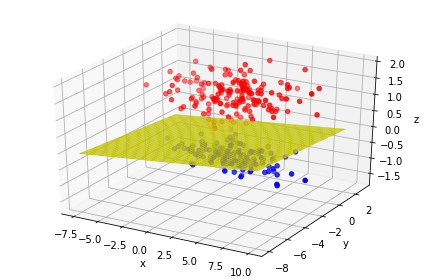

In [8]:
#visualisation
x=np.linspace(-7.5,10,100)
y=np.linspace(-8,2,100)	
x,y=np.meshgrid(x,y)	
z=(-w[0]-w[1]*x-w[2]*y)/w[3]
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, color='yellow')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
points_pos = np.where(test_data.iloc[:, -1].values == 1)
points_neg = np.where(test_data.iloc[:, -1].values == 0) 
X2 = test_data.iloc[points_pos].values[:, 0]
Y2 = test_data.iloc[points_pos].values[:, 1]
Z2 = test_data.iloc[points_pos].values[:, 2]
ax.scatter(X2, Y2, Z2, color='red')
X1 = test_data.iloc[points_neg].values[:, 0]
Y1 = test_data.iloc[points_neg].values[:, 1]
Z1 = test_data.iloc[points_neg].values[:, 2]
ax.scatter(X1, Y1, Z1, color='blue')
ax.set(xlabel='x', ylabel='y', zlabel='z')
fig.tight_layout()
plt.show() 	
plt.show() 	